## A) Machine learning basics – write a paragraph about each of the following:


### i) Supervised, unsupervised, and self-supervised learning:
The three are categories of machine learning problems and algorithms. In supervised learning, data is formed by features and correspondent labels. Therefore, supervised learning algorithms learn functions that map inputs into the desired outputs. Neural networks for classification and linear regression are examples of supervised learning algorithms/models. In unsupervised learning, the data samples are only composed of features. Therefore, unsupervised algorithms learn functions to cluster data into groups and detect patterns in the input data. K-means clustering is an example of an unsupervised learning algorithm. In self-supervised learning, unlabeled data is used. Nevertheless, the model first learns to generate the labels from unstructured data. The model is then trained on the generated labels in a supervised manner. Meta's `wave2vec` speech recognition algorithm is an example of self-supervised learning.

### ii) Data splitting into training and testing.
When training machine learning models, usually we want to run inference in unseen data afterwards. This lets us know how well the trained model is generalizing to data that was not used in the training step. Data spliting into training and testing is used in this sense. The training set is used to train the model, and the test set is used to evaluate the models performance in unseen data, giving a better notion of how the model is able to generalize.

### iii) Cross Validation.
Cross-validation is a scheme for partitioning data into training and testing. The idea is to split the original dataset into k folds, using k-1 folds for training and one for testing. This is performed for all possible combinations of training and testing folds. Therefore, hyperparameters and generalization capabilities are evaluated for several instances of the model in different testing sets.

### iv) Confusion matrix.
A confusion matrix is a $K \times K$ matrix used to evaluate a classification model's performance, with K being the number of designated classes. The true target values are compared to the predicted ones for each class. Therefore, true positive and true negative predictions are compared to false positive and false negative predictions. This evaluation is useful when working with unbalanced datasets and when false positives/negatives can have life-threatening or legal implications.

### v) Model evaluation: define accuracy, sensitivity, and specificity.
Accuracy is the rate of correct predictions over the total of predictions made by the model. Sensitivity, or recall, is the rate of true positives over the number of positive predictions (true positives + false positives). Specificity is the rate of true negatives over negative predictions (true negatives + false negatives).

### vi) Underfitting and Overfitting.
Overfitting occurs when a machine learning model is trained to the extent that causes it to have excellent performance in training data and degraded performance in unseen data. This can happen due to insufficient training data and a model that is too complex for the task. Underfitting is defined as when the model is unable to learn the patterns in training data, having a degraded training performance. This can happen due to using a model with low complexity, insufficient training data, and low-quality training data.

### vii) Balanced and unbalanced datasets.
Unbalanced datasets have heterogeneous label distributions. For example, a dataset used to train a model to detect cancer in CT scans can have a much higher number of patients who don't have cancer than patients with cancer. This can be a problem, as the information about negative cases is much more abundant than positive ones. Balanced datasets are the opposite: classes are homogeneously present, having equal representation in the dataset.

### viii) Normalization vs standardization.
Both are data scaling methods: procedures applied to data before training a model to better represent the scale of different features. Normalization scales the values between 0 and 1 by utilizing the minimum and maximum values: $X' = \frac{X - X_{min}}{X_{max} - X_{min}}$. Standardization centers the features values to the mean $\mu$ with a standard deviation $\sigma = 1$:  $X' = \frac{X - \mu}{\sigma}$. Standardization does not limit the range of values, being more robust to outliers.

### ix) Neural networks.
Artificial neural networks are a class of machine learning models. The input data is processed by several layers of linear combinations $Ax + b$ followed by nonlinear functions such as the sigmoid function. Trained via backpropagation, neural networks are great function approximators. The Universal approximation theorem states that a fully connected neural network with a sufficiently wide hidden layer can approximate any real function arbitrarily well.

### x) Large Language Models.

Large language models are Neural Language Processing (NLP) models mainly based on the Transformer architecture. Tokenization schemes are used to represent common characters and words efficiently, defining the language model vocabulary size. Fine-tuning and prompt engineering are techniques commonly applied to adapt foundation LLM models for performing specialized tasks.

## B) Load Dataset

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#change path to your dataset location
df = pd.read_csv('/content/drive/MyDrive/ECE1513/indian_liver_patient.csv').fillna(0)
df.Gender = pd.factorize(df.Gender)[0]
df_norm = (df-df.min())/(df.max()-df.min())
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [ ]:
# change 'random_state' for different random seed
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df.iloc[:,:-1], df.iloc[:,-1:], test_size= 0.3, random_state=1)
X_train_norm, X_test_norm = sklearn.model_selection.train_test_split(df_norm.iloc[:,:-1], test_size= 0.3, random_state=1)

## C) Train and Evaluate

### i) `LogisticRegression`

In [ ]:
clf_LR = LogisticRegression(random_state=0, max_iter = 1000, penalty = 'l2', solver = 'lbfgs').fit(X_train_norm, y_train.values.ravel())
train_acc_LR = accuracy_score(y_train, clf_LR.predict(X_train_norm), normalize=True)
test_acc_LR = accuracy_score(y_test, clf_LR.predict(X_test_norm), normalize=True)
print('Train accuracy: ',train_acc_LR)
print('Test accuracy: ',test_acc_LR)

Train accuracy:  0.7132352941176471
Test accuracy:  0.7142857142857143


### ii) `svm`

In [ ]:
clf_SVM = SVC(kernel = 'linear', gamma = 'auto', max_iter = 1000).fit(X_train_norm, y_train.values.ravel())
train_acc_SVM = accuracy_score(y_train, clf_SVM.predict(X_train_norm), normalize=True)
test_acc_SVM = accuracy_score(y_test, clf_SVM.predict(X_test_norm), normalize=True)
print('Train accuracy: ',train_acc_SVM)
print('Test accuracy: ',test_acc_SVM)

Train accuracy:  0.7132352941176471
Test accuracy:  0.7142857142857143


### iii) `DecisionTreeClassifier`

In [ ]:
clf_DTC = DecisionTreeClassifier(criterion = 'entropy',random_state=2).fit(X_train_norm, y_train.values.ravel())
train_acc_DTC = accuracy_score(y_train, clf_DTC.predict(X_train_norm), normalize=True)
test_acc_DTC = accuracy_score(y_test, clf_DTC.predict(X_test_norm), normalize=True)
print('Train accuracy: ',train_acc_DTC)
print('Test accuracy: ',test_acc_DTC)

Train accuracy:  1.0
Test accuracy:  0.7085714285714285


### iv) `LinearDiscriminantAnalysis`

In [ ]:
clf_LDA = LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'eigen').fit(X_train_norm, y_train.values.ravel())
train_acc_LDA = accuracy_score(y_train, clf_LDA.predict(X_train_norm), normalize=True)
test_acc_LDA = accuracy_score(y_test, clf_LDA.predict(X_test_norm), normalize=True)
print('Train accuracy: ',train_acc_LDA)
print('Test accuracy: ',test_acc_LDA)

Train accuracy:  0.7254901960784313
Test accuracy:  0.7257142857142858


## D) Model Accuracy Comparison

The table below displays the train and test accuracies for each implemented model. All models were trained with a normalized version of the dataset. Hyperparameters were manually selected to yield the best performance on Test Accuracy. As shown, all models present test accuracy values close to  0.7. This can be justified by the linear nature of `LogisticRegression` , `svm` ,`LinearDiscriminantAnalysis`, and the piece-wise linear nature of `DecisionTreeClassifier`.

The best test accuracy was achieved by the `LinearDiscriminantAnalysis` model. We can hypothesize that the dimensionality reduction applied by LDA provided a better class separation than the other models. Possible downsides from the other models are: the instability of `DecisionTreeClassifier` to noisy data, and the inability of the `LogisticRegression` and `svm` linear models to successfully separate classes without dimensionality reduction.


|Model                            | Train Accuracy| Test Accuracy |
|---------------------------------|---------------|---------------|
|`LogisticRegression`             | 0.7132        | 0.7142        |
|`svm`                            | 0.7132        | 0.7142        |
|`DecisionTreeClassifier`         | 1.0           | 0.7085        |
|`LinearDiscriminantAnalysis`     | 0.7254        | 0.7257        |

Short model descriptions:
*   **Logistic regression** is a linear model that utilizes the logistic sigmoid function $\sigma(\cdot)$ to model the probabilities of an input corresponding to a specific label. Given a set of parameters $W$, the probability of the feature vector $\phi$ belonging to class $C_1$ is given by $p(C_1|\phi) = \sigma(W^T\phi+b)$. Moreover, the model utilizes $L2$ weight regulariation to avoid overfitting.

*   **Support vector machine** is a sparse kernel method. The classification problem is approached through the concept of a margin. The margin is defined as the smallest distance between a decision boundary and all samples. Therefore, SVMs seek solution boundaries that maximize the margin.

*   **Decision tree** is a non-parametric classification algorithm. The algorithm builds a classification model that predicts the final class based on the path taken within the decision tree according to the data feature values.

*   **Linear discriminant analysis** is a generalization of Fisher's linear discriminant. LDA projects the data onto a lower-dimensional space, maximizing the separation between classes.

## E) K-nearest Neighbors

We can observe that the best value is $k = 20$. When k is too small, the model is visibly overfitting, as training accuracy is high, but test accuracy is low. As k grows, the gap between both curves decreases, and the test accuracy reaches its best value at $k = 20$. We can justify the better performance at this point due to the high variance and low bias of utilizing small values for $k$.

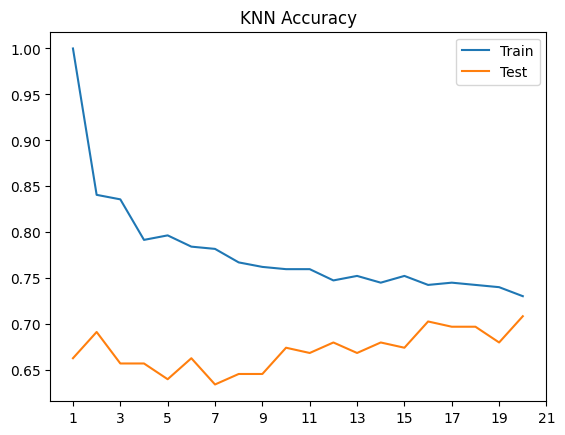

In [ ]:
def select_knn_model(k_max, X_train, y_train, X_test, y_test, plot = True):
    train_acc = []
    test_acc = []
    k_range = []
    knn_models = []

    for k in range(1,k_max+1):
        knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
        k_range.append(k)
        train_acc.append(accuracy_score(y_train, knn.predict(X_train), normalize=True))
        test_acc.append(accuracy_score(y_test, knn.predict(X_test), normalize=True))
        knn_models.append(knn)
    if plot:
        plt.title('KNN Accuracy')
        plt.plot(k_range, train_acc, '-',label ='Train')
        plt.plot(k_range, test_acc, '-',label ='Test')
        plt.xticks(np.arange(1, k_max +2, 2))
        plt.legend()

    return knn_models[np.argmax(test_acc)]
best_knn = select_knn_model(20, X_train_norm, y_train, X_test_norm, y_test)

## F) Balanced or unbalanced

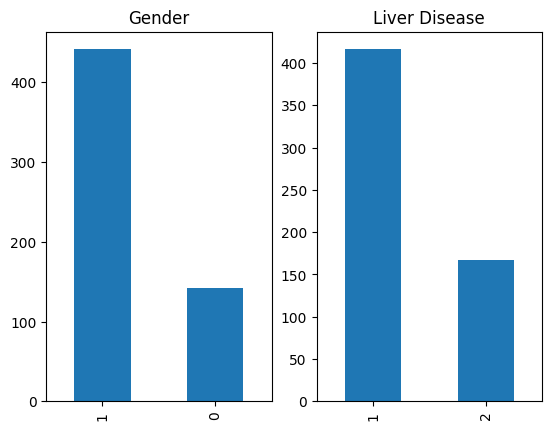

In [ ]:
plt.subplot(1, 2, 1)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender')
plt.subplot(1, 2, 2)
df['Dataset'].value_counts().plot(kind='bar')
plt.title('Liver Disease')
plt.show()

We can observe on the gender and Liver disease plot that both features and the variable of interest for classification are unbalanced. Proper metrics for evaluating models trained on unbalanced datasets are `F1 score`, `Precision`, and `Recall`. Besides proper evaluation metrics, data augmentation, balancing the dataset by sampling new examples from unrepresented classes, and testing different classifier algorithms are methods that can be used to increase the performance of models trained on unbalanced data.

## G) Parameter importance

In [ ]:
models = [clf_LR, clf_SVM, clf_DTC, clf_LDA, best_knn]
model_names = ['Logistic Regression','Support Vector Machine', 'Decision Tree', 'Linear Discriminant Analysis', 'K Nearest Neighbors']
features = df_norm.iloc[:,:-1].columns
print('__________________________________________________________________________________________________________')
for model, model_name in zip(models, model_names):

    higher_importance = []
    all_importance = []
    result = permutation_importance(model, df_norm.iloc[:,:-1], df_norm.iloc[:,-1:],n_repeats = 10)
    all_importance = result['importances_mean']
    if np.sum(all_importance) == 0:
        higher_importance = [0,0,0]
    else:
        for i in range(3):
            index = np.argmax(all_importance)
            higher_importance.append(features[index])
            all_importance[index] = float('-inf')

    print('|',model_name,'    |    ', higher_importance)
    print('__________________________________________________________________________________________________________')


__________________________________________________________________________________________________________
| Logistic Regression     |     ['Total_Protiens', 'Albumin', 'Gender']
__________________________________________________________________________________________________________
| Support Vector Machine     |     [0, 0, 0]
__________________________________________________________________________________________________________
| Decision Tree     |     ['Gender', 'Albumin', 'Albumin_and_Globulin_Ratio']
__________________________________________________________________________________________________________
| Linear Discriminant Analysis     |     ['Total_Protiens', 'Gender', 'Alamine_Aminotransferase']
__________________________________________________________________________________________________________
| K Nearest Neighbors     |     ['Total_Protiens', 'Aspartate_Aminotransferase', 'Total_Bilirubin']
________________________________________________________________________

For this analysis, we are not going to consider
the SVM model, as all the importance values were outputed as $0$.Given the top three values with the highest importance for each model with valid outputs, we can observe that the models agree on some features. `Gender` appears in 3/4 results, `Total_Protiens` appears in 3/4 results, and `Albumin` appears in 2/4 results. For the remaining features, there is no agreement on importance. We can hypothesize that this happens due to the different nature of each model. Nevertheless, other importance metrics can be used to have more arguments on why this is happening. Correlation and single variable prediction importance methods are examples besides the permutation importance metric used.